In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pixellib

     |████████████████████████████████| 71kB 9.5MB/s 
  Created wheel for imantics: filename=imantics-0.1.12-cp37-none-any.whl size=16033 sha256=188773cb6cc28c733cd3b9d8edcd805ee00f92901a78b709ea440a6d548107d2
  Stored in directory: /root/.cache/pip/wheels/73/93/1c/9e2fc52eb74441941bc76cac441ddcc2c7ad67b18e1849e62a
Successfully built imantics


In [ ]:
import shutil 
shutil.unpack_archive('/content/gdrive/MyDrive/plants.zip')

In [ ]:
import pixellib
from pixellib.custom_train import instance_custom_training

In [ ]:
train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 1, batch_size = 4)
train_maskrcnn.load_pretrained_model("/content/gdrive/MyDrive/mask_rcnn_coco (1).h5")

Using resnet101 as network backbone For Mask R-CNN model


In [ ]:
train_maskrcnn.load_dataset("/content/custom_train_data")
train_maskrcnn.train_model(num_epochs = 300, augmentation=True,  path_trained_models = "mask_rcnn_models")


In [ ]:
import pixellib
from pixellib.custom_train import instance_custom_training
vis_img = instance_custom_training()
vis_img.load_dataset("plants")

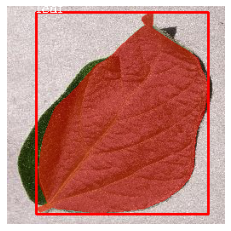

In [ ]:
vis_img.visualize_sample()

In [ ]:
train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 1, batch_size = 6)
train_maskrcnn.load_pretrained_model("/content/gdrive/MyDrive/mask_rcnn_coco (1).h5")
train_maskrcnn.load_dataset("plants") 

Using resnet101 as network backbone For Mask R-CNN model


In [ ]:
train_maskrcnn.train_model(num_epochs = 100, augmentation=True,path_trained_models ="/content/gdrive/My Drive/plant_percent_model")

In [ ]:
import pixellib
from pixellib.instance import custom_segmentation

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 1, class_names= ["leaf"])
segment_image.load_model("/content/gdrive/MyDrive/plant_percent_model/mask_rcnn_model.031-0.045407.h5")

In [ ]:
segment_image.segmentImage("sample3.jpg",extract_segmented_objects=True,save_extracted_objects=True,show_bboxes=False, output_image_name="sample_out3.jpg")

Processed image saved successfully in your current working directory.


({'class_ids': array([1], dtype=int32),
  'extracted_objects': array([[[[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
  
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
  
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
  
          ...,
  
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
  
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
  
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]]]], dtype=obje

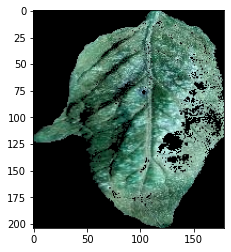

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image=cv2.imread('/content/segmented_object_1.jpg')
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
lower_hsv = np.array([22,46,46])
higher_hsv = np.array([65,255,255])
mask = cv2.inRange(hsv, lower_hsv, higher_hsv)
frame = cv2.bitwise_and(image,image, mask=mask)
plt.imshow(frame)

In [ ]:
c1=0
c2=0
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    r=image[i][j][0]
    g=image[i][j][1]
    b=image[i][j][2]
    r1=frame[i][j][0]
    g1=frame[i][j][1]
    b1=frame[i][j][2]
    if [r,g,b]!=[0,0,0]:
      c1+=1
    if [r1,g1,b1]!=[0,0,0]:
      c2+=1
print(c1,c2)

25238 19717


In [ ]:
print(1-(c2/c1))

0.21875742927331798
